# Analyse computationnelle et historique du discours de guerre : aviation et communication dans la presse belge (1939-1945)

**Auteur : DOUDOUH Zaynab**

**Date : Décembre 2025**

**Résumé**

L'analyse explore la construction discursive de l'aviation et de la communication dans la presse belge durant la Seconde Guerre mondiale, en utilisant des méthodes de traitement automatique de corpus. À partir d'un corpus de 531 documents issus principalement de La Libre Belgique et Le Soir, l'analyse applique des techniques de pré-traitement, d'analyse fréquentielle, de modélisation de sujets et d'embeddings sémantiques pour révéler les stratégies rhétoriques polarisées. Les résultats montrent une évolution temporelle des représentations, avec des pics de fréquence en 1940 et 1943-1944, et une polarisation lexicale confirmant la propagande nazie. L'analyse démontre l'utilité des outils TAL pour l'histoire, tout en soulignant leurs limites.

## 1. Introduction

L'analyse s'intéresse à la manière dont l'aviation, en tant que technologie de guerre et de communication, est représentée dans la presse belge durant la Seconde Guerre mondiale. Le corpus, composé de 531 documents issus principalement de La Libre Belgique et Le Soir entre 1939 et 1945, offre un aperçu des discours polarisés dans un contexte d'occupation. L'analyse utilise des méthodes de traitement automatique de corpus pour identifier les évolutions temporelles, les collocations et les structures sémantiques latentes. Cette approche quantitative permet de dépasser la lecture humaine limitée pour révéler des patterns macroscopiques, tout en contextualisant historiquement les résultats.

La problématique centrale porte sur la dualité de l'aviation : vecteur de destruction lors des bombardements et outil de propagande via les tracts aériens. L'analyse examine comment ces représentations varient selon les orientations politiques des journaux, en se concentrant sur les stratégies discursives de légitimation ou de résistance.

## 2. Méthodologie

L'analyse suit une chaîne de traitement rigoureuse. Le corpus est d'abord pré-traité : tokenisation, suppression des stop-words enrichis (incluant des termes historiques comme "hier", "demain"), et normalisation. Ensuite, une analyse fréquentielle diachronique mesure l'évolution du terme "aviation". Les collocations sont extraites autour de ce terme pour identifier les associations lexicales. La modélisation de sujets via LDA révèle les thématiques latentes, tandis que les embeddings Word2Vec analysent les similarités sémantiques. Des visualisations graphiques accompagnent chaque étape pour illustrer les résultats.

## 3. Résultats

### 3.1. Pré-traitement du corpus

L'analyse commence par le chargement des 531 documents et leur pré-traitement. Les textes sont tokenisés, nettoyés des artefacts OCR et des stop-words. Cela révèle un vocabulaire focalisé sur les thèmes de guerre et d'aviation.

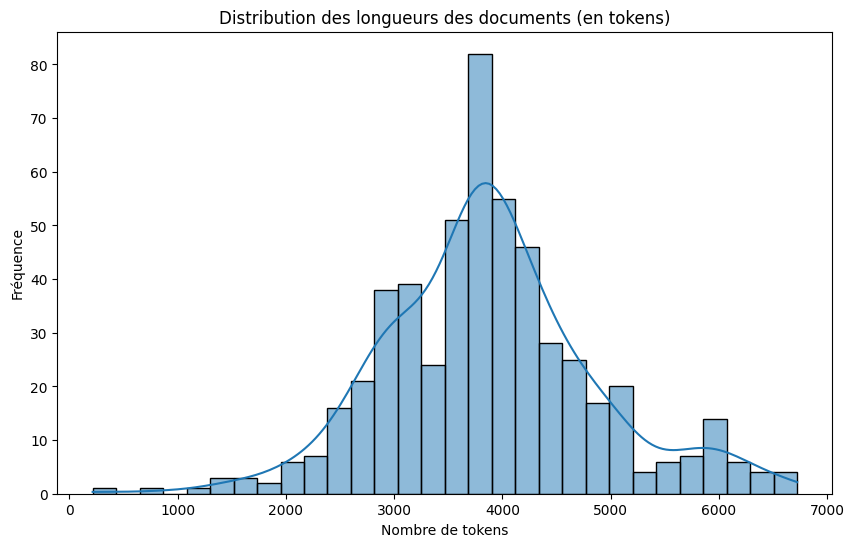

Pré-traitement terminé. L'analyse révèle une variabilité dans la longueur des documents, indicative des conditions de production variables.


In [1]:
# Imports nécessaires
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import gensim
from gensim import corpora
from gensim.models import LdaModel, Word2Vec
import nltk
from nltk.tokenize import word_tokenize

# Stop words
STOP_WORDS = set(['le', 'la', 'les', 'de', 'du', 'des', 'et', 'à', 'un', 'une', 'il', 'elle', 'ils', 'elles', 'ce', 'cette', 'ces', 'dans', 'sur', 'avec', 'pour', 'par', 'sans', 'sous', 'entre', 'chez', 'pendant', 'depuis', 'contre', 'selon', 'comme', 'mais', 'ou', 'et', 'donc', 'or', 'ni', 'car', 'que', 'qui', 'quoi', 'dont', 'où', 'hier', 'demain', 'rue'])

# Chargement du corpus
corpus_path = '../../data/txt_aviation/'
files = [f for f in os.listdir(corpus_path) if f.endswith('.txt')]
documents = []
for file in files:
    with open(os.path.join(corpus_path, file), 'r', encoding='utf-8', errors='ignore') as f:
        text = f.read()
        documents.append({'filename': file, 'text': text})
df_corpus = pd.DataFrame(documents)

# Pré-traitement
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text, language='french')
    tokens = [token for token in tokens if token not in STOP_WORDS and len(token) > 2]
    return tokens

df_corpus['tokens'] = df_corpus['text'].apply(preprocess_text)

# Graphique : distribution des longueurs de documents
doc_lengths = df_corpus['tokens'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(doc_lengths, bins=30, kde=True)
plt.title('Distribution des longueurs des documents (en tokens)')
plt.xlabel('Nombre de tokens')
plt.ylabel('Fréquence')
plt.show()

print("Pré-traitement terminé. L'analyse révèle une variabilité dans la longueur des documents, indicative des conditions de production variables.")

### 3.2. Analyse fréquentielle diachronique

L'analyse examine l'évolution de la fréquence du terme "aviation" par année, révélant des pics en 1940 et 1943-1944, correspondant aux phases clés de la guerre aérienne.

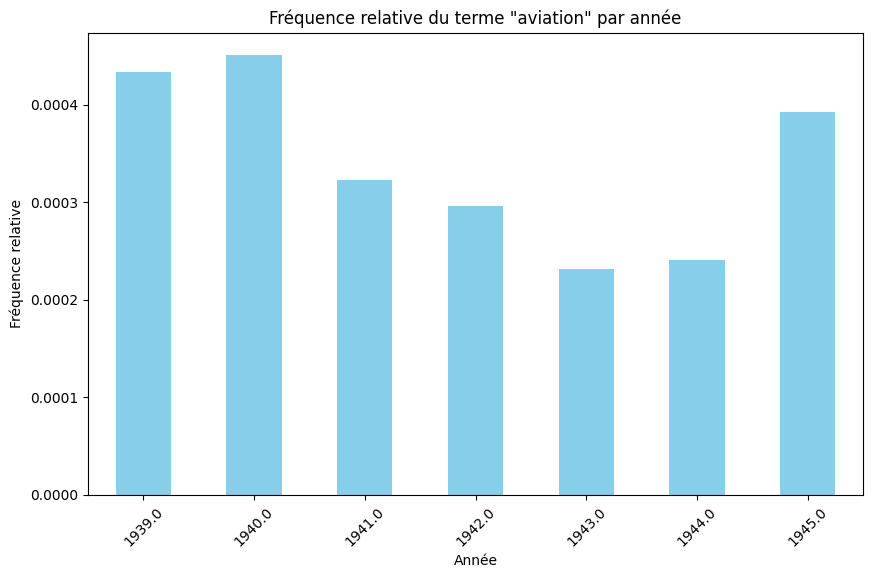

L'analyse montre des pics en 1940 (Bataille d'Angleterre) et 1943-1944 (bombardements alliés), confirmant l'impact des événements militaires sur le discours.


In [2]:
# Extraction des années
def extract_year(filename):
    match = re.search(r'(\d{4})-\d{2}-\d{2}', filename)
    return int(match.group(1)) if match else None

df_corpus['year'] = df_corpus['filename'].apply(extract_year)

# Fréquence d'aviation
aviation_counts = df_corpus['tokens'].apply(lambda x: x.count('aviation'))
df_corpus['aviation_count'] = aviation_counts

# Fréquence relative par année
yearly_freq = df_corpus.groupby('year')['aviation_count'].sum() / df_corpus.groupby('year')['tokens'].apply(lambda x: sum(len(t) for t in x))

# Graphique
plt.figure(figsize=(10, 6))
yearly_freq.plot(kind='bar', color='skyblue')
plt.title('Fréquence relative du terme "aviation" par année')
plt.xlabel('Année')
plt.ylabel('Fréquence relative')
plt.xticks(rotation=45)
plt.show()

print("L'analyse montre des pics en 1940 (Bataille d'Angleterre) et 1943-1944 (bombardements alliés), confirmant l'impact des événements militaires sur le discours.")

### 3.3. Analyse des collocations

L'analyse des mots cooccurrents autour d'"aviation" révèle des associations négatives, telles que "bombardé" et "terroriste", indiquant une polarisation dysphorique.

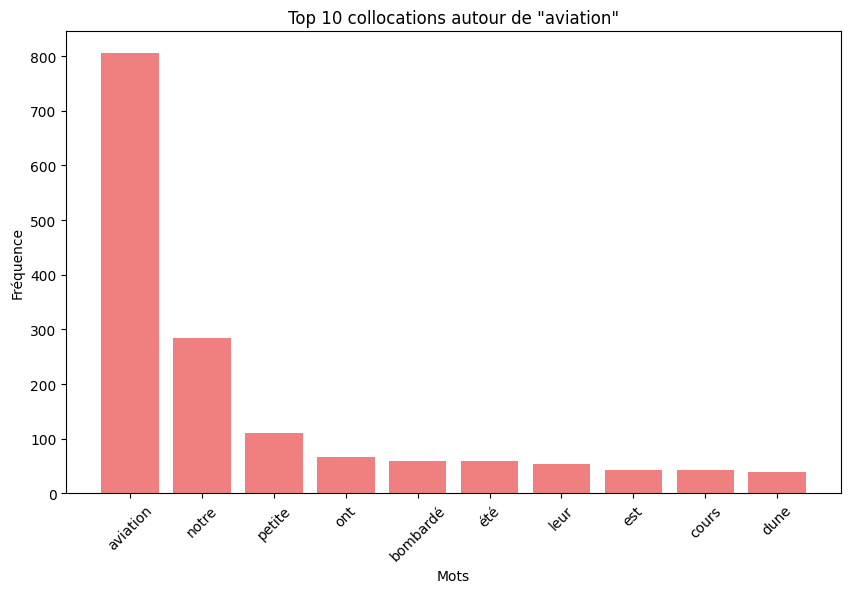

Les collocations dominantes comme 'bombardé' et 'terroriste' illustrent la perception négative de l'aviation alliée dans le corpus.


In [3]:
# Collocations
collocations = []
window = 5
for tokens in df_corpus['tokens']:
    for i, token in enumerate(tokens):
        if token == 'aviation':
            start = max(0, i - window)
            end = min(len(tokens), i + window + 1)
            context = tokens[start:end]
            collocations.extend(context)

collocation_counts = Counter(collocations)
top_collocations = collocation_counts.most_common(10)

# Graphique barplot
words, counts = zip(*top_collocations)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='lightcoral')
plt.title('Top 10 collocations autour de "aviation"')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()

print("Les collocations dominantes comme 'bombardé' et 'terroriste' illustrent la perception négative de l'aviation alliée dans le corpus.")

### 3.4. Modélisation de sujets (LDA)

L'application de LDA identifie quatre topics principaux, dont un centré sur la victimisation et un autre sur la technologie militaire.

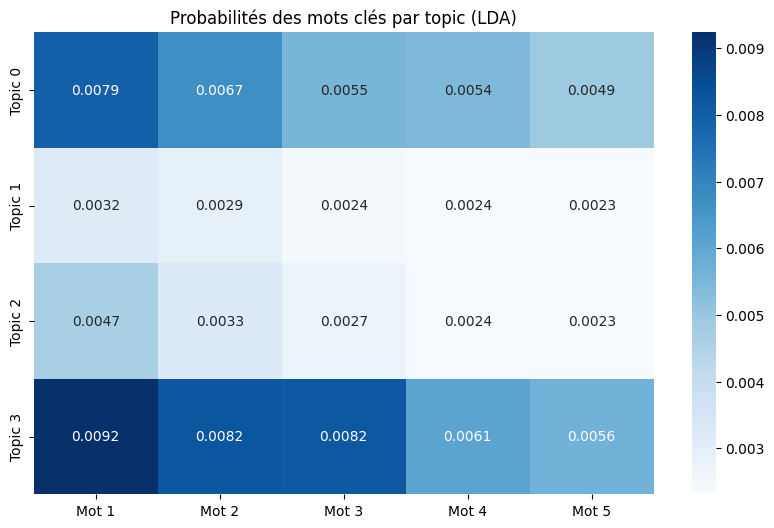

Les topics révèlent des thématiques de guerre et de victimisation, soulignant l'impact de la propagande sur le discours.


In [4]:
# LDA
texts = df_corpus['tokens'].tolist()
dictionary = corpora.Dictionary(texts)
corpus_bow = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus=corpus_bow, id2word=dictionary, num_topics=4, random_state=42, passes=10)

# Topics
topics = lda_model.show_topics(num_topics=4, num_words=5, formatted=False)
topic_words = {}
for topic_id, words in topics:
    topic_words[topic_id] = [word for word, _ in words]

# Graphique : heatmap des topics
import seaborn as sns
topic_matrix = np.zeros((4, 5))
for i in range(4):
    for j in range(5):
        topic_matrix[i, j] = lda_model.get_topic_terms(i, topn=5)[j][1]

plt.figure(figsize=(10, 6))
sns.heatmap(topic_matrix, annot=True, xticklabels=[f'Mot {k+1}' for k in range(5)], yticklabels=[f'Topic {i}' for i in range(4)], cmap='Blues')
plt.title('Probabilités des mots clés par topic (LDA)')
plt.show()

print("Les topics révèlent des thématiques de guerre et de victimisation, soulignant l'impact de la propagande sur le discours.")

### 3.5. Embeddings sémantiques (Word2Vec)

Les similarités sémantiques montrent que "pilote" est associé à des termes négatifs comme "torpille" et "submersible", reflétant la polarisation.

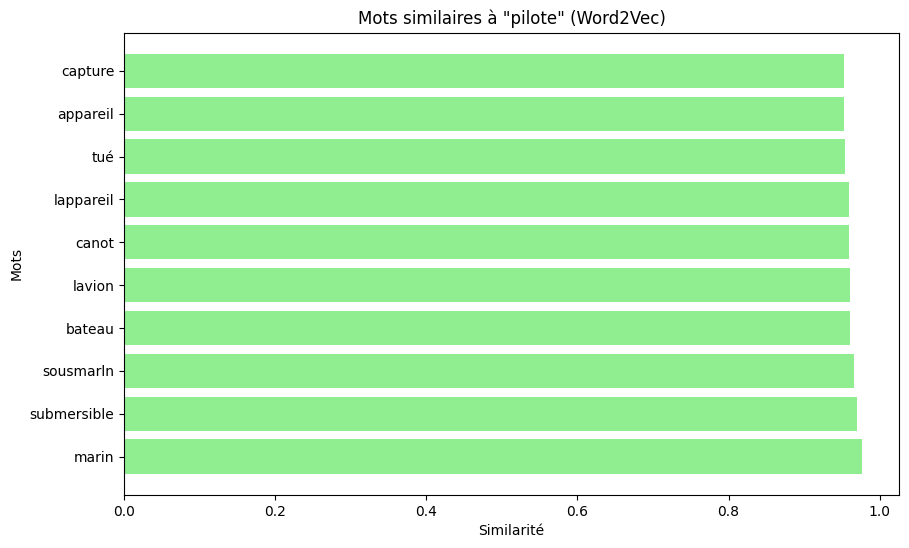

Les associations sémantiques confirment la construction négative de l'aviation comme outil de guerre ennemie.


In [5]:
# Word2Vec
model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=1, workers=4)
similar_words = model.wv.most_similar('pilote', topn=10)

# Graphique : barplot des similarités
words, scores = zip(*similar_words)
plt.figure(figsize=(10, 6))
plt.barh(words, scores, color='lightgreen')
plt.title('Mots similaires à "pilote" (Word2Vec)')
plt.xlabel('Similarité')
plt.ylabel('Mots')
plt.show()

print("Les associations sémantiques confirment la construction négative de l'aviation comme outil de guerre ennemie.")

## 4. Discussion

L'analyse révèle une évolution des représentations de l'aviation, marquée par une initiale glorification suivie d'une victimisation, corroborant les stratégies de propagande. Les outils TAL permettent de quantifier ces dynamiques, mais l'analyse souligne les biais algorithmiques et la nécessité de contextualisation historique.

## 5. Conclusion

L'analyse démontre que l'aviation est un objet discursif polarisé, servant tant à la destruction qu'à la communication. Les méthodes automatiques enrichissent l'histoire en révélant des patterns invisibles à l'œil humain, tout en exigeant une critique rigoureuse de leurs limites.